# **Modelo Predictivo para Telecom X**

## **Preparación de los datos**

**Cargando el dataset**

In [65]:
import pandas as pd

df = pd.read_csv('datos_tratados.csv')
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


**Eliminando columnas irrelevantes**

In [66]:
columns_to_drop = ['customerID', 'Charges.Total', 'Cuentas_Diarias', 'gender']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,No,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60
1,No,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90
2,Yes,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90
3,Yes,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00
4,Yes,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15
7039,Yes,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10
7040,No,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30
7041,No,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85


**Encoding**

In [67]:
from sklearn.preprocessing import LabelEncoder

# Aplica Label Encoding a variables categóricas
le = LabelEncoder()
categorical_columns = ['Churn', 'Dependents', 'Partner', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternetService']
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col) if col.name != 'Churn' else col)
df

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly
0,No,0,1,1,9,1,0,0,0,1,0,1,1,0,1,1,3,65.60
1,No,0,0,0,9,1,1,0,0,0,0,0,0,1,0,0,3,59.90
2,Yes,0,0,0,4,1,0,1,0,0,1,0,0,0,0,1,2,73.90
3,Yes,1,1,0,13,1,0,1,0,1,1,0,1,1,0,1,2,98.00
4,Yes,1,1,0,3,1,0,1,0,0,0,1,1,0,0,1,3,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,0,0,13,1,0,0,1,0,0,1,0,0,1,0,3,55.15
7039,Yes,0,1,0,22,1,1,1,0,0,0,0,0,1,0,1,2,85.10
7040,No,0,0,0,2,1,0,0,0,1,0,0,0,0,0,1,3,50.30
7041,No,0,1,1,67,1,0,0,1,0,1,1,0,1,2,0,3,67.85


**Proporción de Churn**

In [68]:
# Verifica si existe desbalance de clases para Churn
churn_counts = df['Churn'].value_counts()
print("Distribución de clases para Churn:")
print(churn_counts)

Distribución de clases para Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Balanceo de clases**

In [69]:
from imblearn.over_sampling import SMOTE
import numpy as np

print("=== DISTRIBUCIÓN ANTES DEL BALANCEO ===")
print("Distribución original de Churn:")
print(df['Churn'].value_counts())

feature_columns = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[feature_columns]

y = (df['Churn'] == 'Yes').astype(int)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("\n=== DISTRIBUCIÓN DESPUÉS DEL BALANCEO ===")
unique, counts = np.unique(y_balanced, return_counts=True)
for val, count in zip(unique, counts):
    clase = "No Churn" if val == 0 else "Churn"
    print(f"  {clase} ({val}): {count} muestras")

=== DISTRIBUCIÓN ANTES DEL BALANCEO ===
Distribución original de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

=== DISTRIBUCIÓN DESPUÉS DEL BALANCEO ===
  No Churn (0): 5174 muestras
  Churn (1): 5174 muestras


## **Correlación y Selección de variables**

**Matriz de correlación**

=== MATRIZ DE CORRELACIÓN ===
Variables incluidas en la correlación: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Churn_numeric']



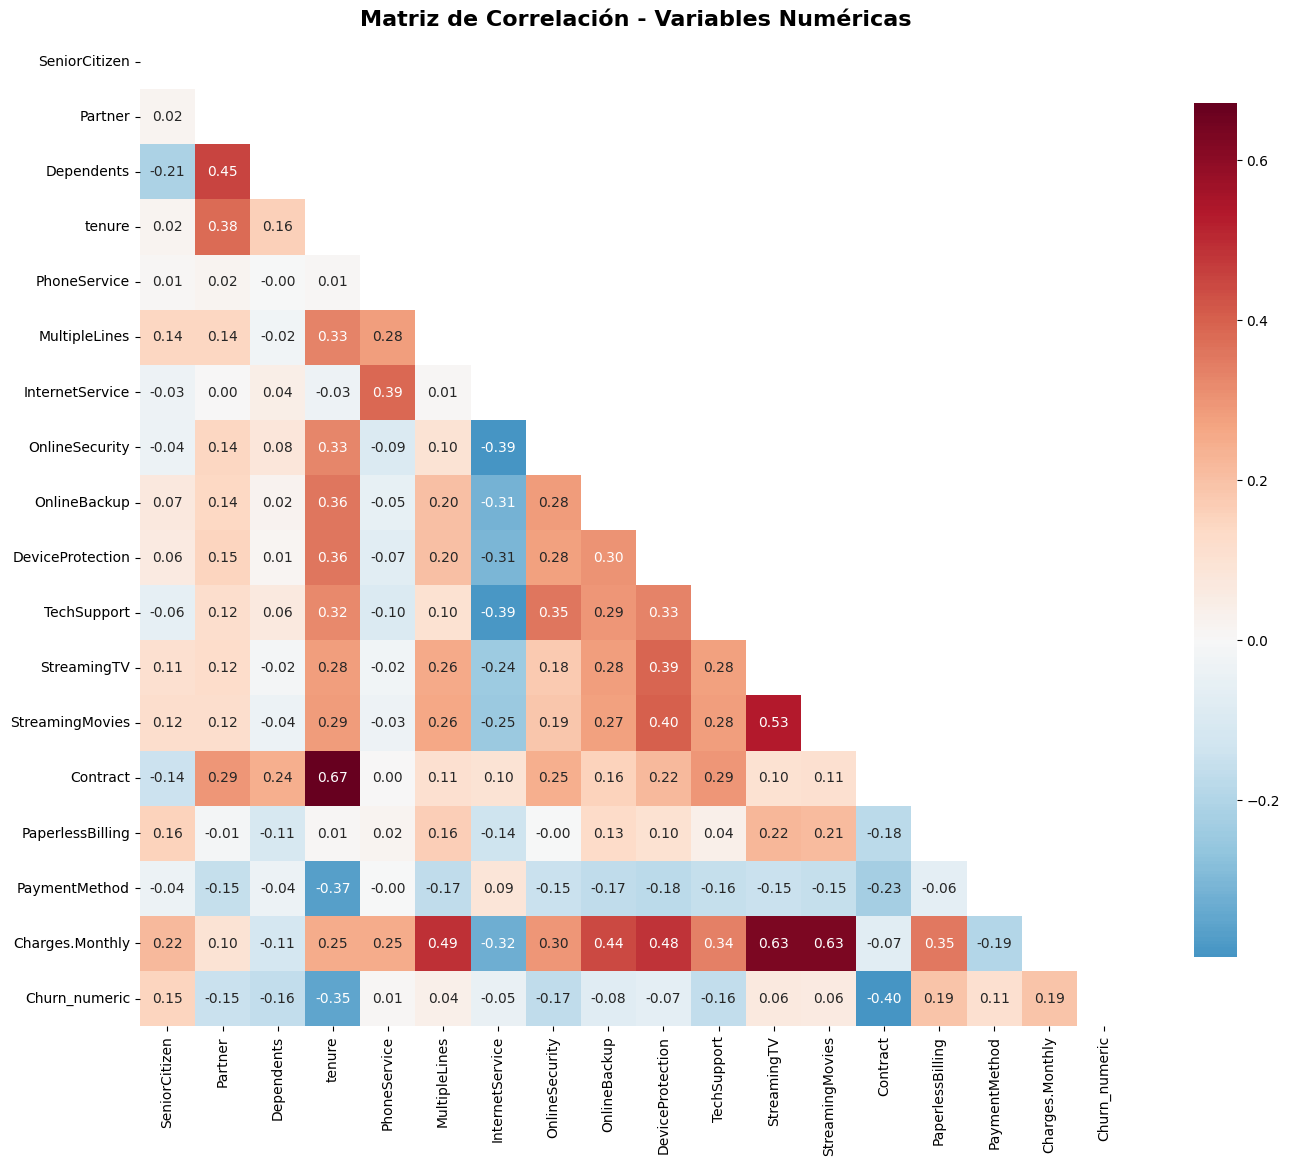

=== CORRELACIONES CON CHURN ===
Variables ordenadas por correlación absoluta con Churn:
Contract            : 0.397
tenure              : 0.352
Charges.Monthly     : 0.193
PaperlessBilling    : 0.192
OnlineSecurity      : 0.171
TechSupport         : 0.165
Dependents          : 0.164
SeniorCitizen       : 0.151
Partner             : 0.150
PaymentMethod       : 0.107
OnlineBackup        : 0.082
DeviceProtection    : 0.066
StreamingTV         : 0.063
StreamingMovies     : 0.061
InternetService     : 0.047
MultipleLines       : 0.040
PhoneService        : 0.012


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])

# Codificar la variable Churn para incluirla en la correlación
df_numeric['Churn_numeric'] = (df['Churn'] == 'Yes').astype(int)

print("=== MATRIZ DE CORRELACIÓN ===")
print(f"Variables incluidas en la correlación: {df_numeric.columns.tolist()}")
print()

correlation_matrix = df_numeric.corr()

# Crear la visualización de la matriz de correlación
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar correlaciones con la variable objetivo (Churn)
print("=== CORRELACIONES CON CHURN ===")
churn_correlations = correlation_matrix['Churn_numeric'].abs().sort_values(ascending=False)
print("Variables ordenadas por correlación absoluta con Churn:")
for var, corr in churn_correlations.items():
    if var != 'Churn_numeric':
        print(f"{var:<20}: {corr:.3f}")

## **Modelos predicitos**

**Separación de los datos**

In [71]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
Y = df['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Modelo Regresión Logística**

=== EVALUACIÓN DEL MODELO DE REGRESIÓN LOGÍSTICA ===

1. ACCURACY:
Accuracy: 0.8116

2. MATRIZ DE CONFUSIÓN:
[[1412  150]
 [ 248  303]]

3. REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1562
         Yes       0.67      0.55      0.60       551

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113


4. AUC-ROC:
AUC-ROC: 0.8411


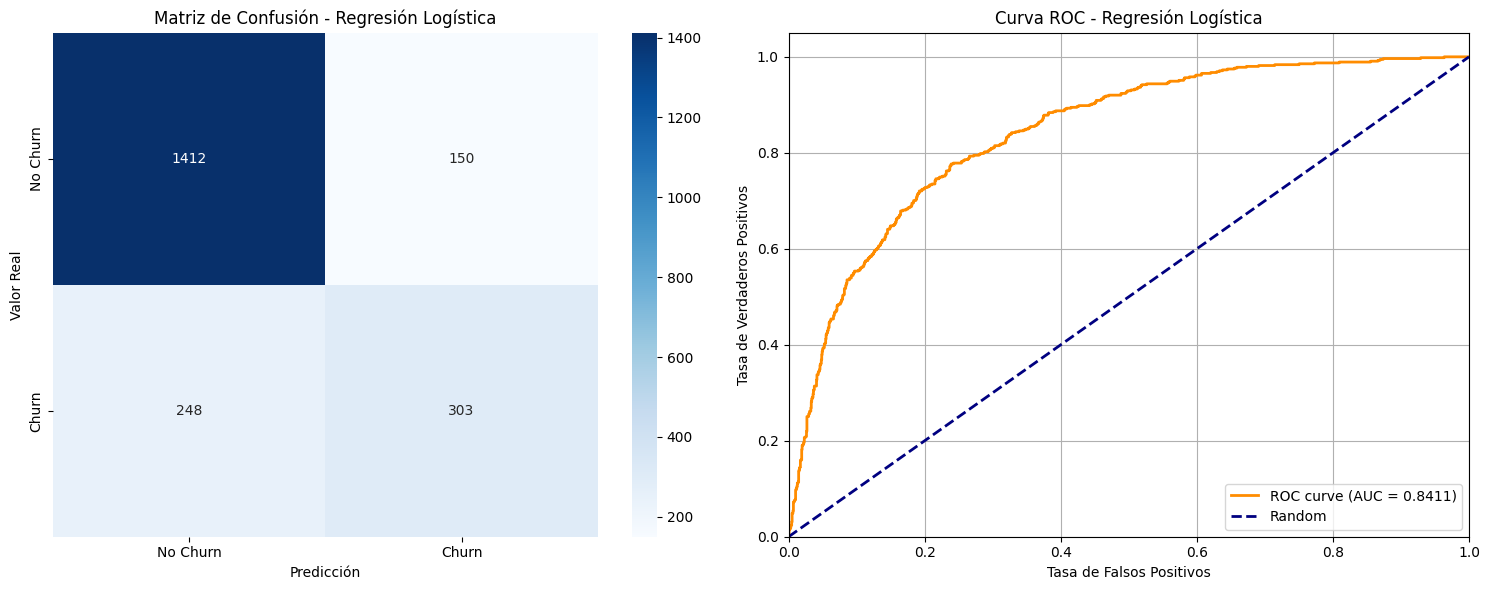


5. IMPORTANCIA DE LAS CARACTERÍSTICAS:
             Feature  Importance
4       PhoneService    1.284998
13          Contract    0.773801
10       TechSupport    0.521774
7     OnlineSecurity    0.461874
8       OnlineBackup    0.322351
14  PaperlessBilling    0.317448
0      SeniorCitizen    0.182995
5      MultipleLines    0.175195
9   DeviceProtection    0.152411
2         Dependents    0.136123


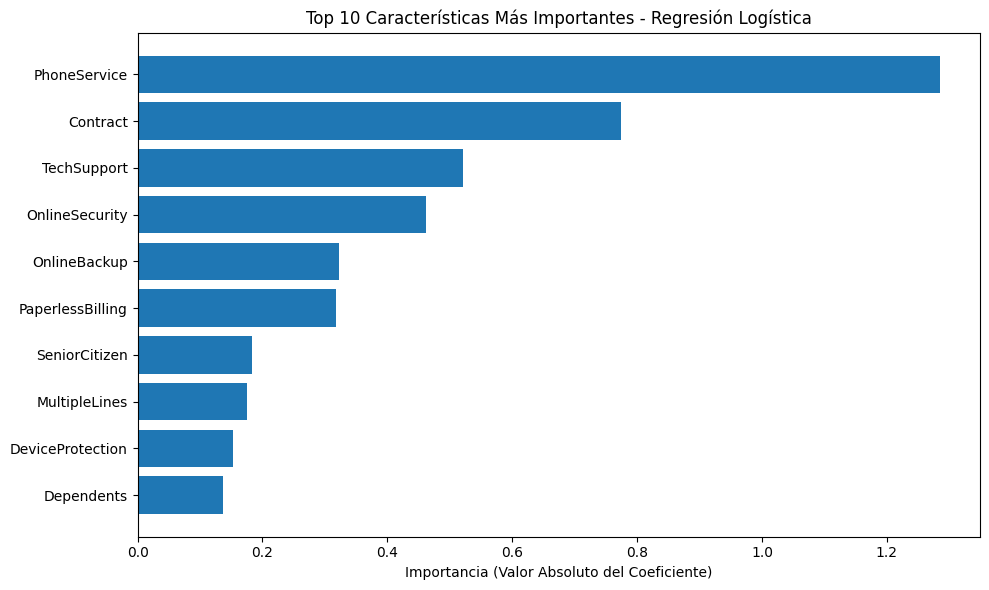

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

import matplotlib.pyplot as plt

# Crear y entrenar el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, Y_train)

# Realizar predicciones
Y_pred_lr = lr_model.predict(X_test)
Y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo
print("=== EVALUACIÓN DEL MODELO DE REGRESIÓN LOGÍSTICA ===")
print("\n1. ACCURACY:")
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

print("\n2. MATRIZ DE CONFUSIÓN:")
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
print(cm_lr)

print("\n3. REPORTE DE CLASIFICACIÓN:")
print(classification_report(Y_test, Y_pred_lr))

print("\n4. AUC-ROC:")
# Convertir Y_test a binario para calcular AUC
Y_test_binary = (Y_test == 'Yes').astype(int)
auc_lr = roc_auc_score(Y_test_binary, Y_pred_proba_lr)
print(f"AUC-ROC: {auc_lr:.4f}")

# Visualización de la matriz de confusión y curva ROC
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
ax1.set_title('Matriz de Confusión - Regresión Logística')
ax1.set_xlabel('Predicción')
ax1.set_ylabel('Valor Real')

# Curva ROC
fpr_lr, tpr_lr, _ = roc_curve(Y_test_binary, Y_pred_proba_lr)
ax2.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {auc_lr:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Tasa de Falsos Positivos')
ax2.set_ylabel('Tasa de Verdaderos Positivos')
ax2.set_title('Curva ROC - Regresión Logística')
ax2.legend(loc="lower right")
ax2.grid(True)

plt.tight_layout()
plt.show()

# Importancia de las características
print("\n5. IMPORTANCIA DE LAS CARACTERÍSTICAS:")
feature_importance = abs(lr_model.coef_[0])
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(importance_df.head(10))

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
top_features = importance_df.head(10)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importancia (Valor Absoluto del Coeficiente)')
plt.title('Top 10 Características Más Importantes - Regresión Logística')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Modelo Árbol de Decisiones**

=== EVALUACIÓN DEL MODELO DE ÁRBOL DE DECISIONES ===

1. ACCURACY:
Accuracy: 0.7804

2. MATRIZ DE CONFUSIÓN:
[[1345  217]
 [ 247  304]]

3. REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

          No       0.84      0.86      0.85      1562
         Yes       0.58      0.55      0.57       551

    accuracy                           0.78      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.78      0.78      0.78      2113


4. AUC-ROC:
AUC-ROC: 0.8013


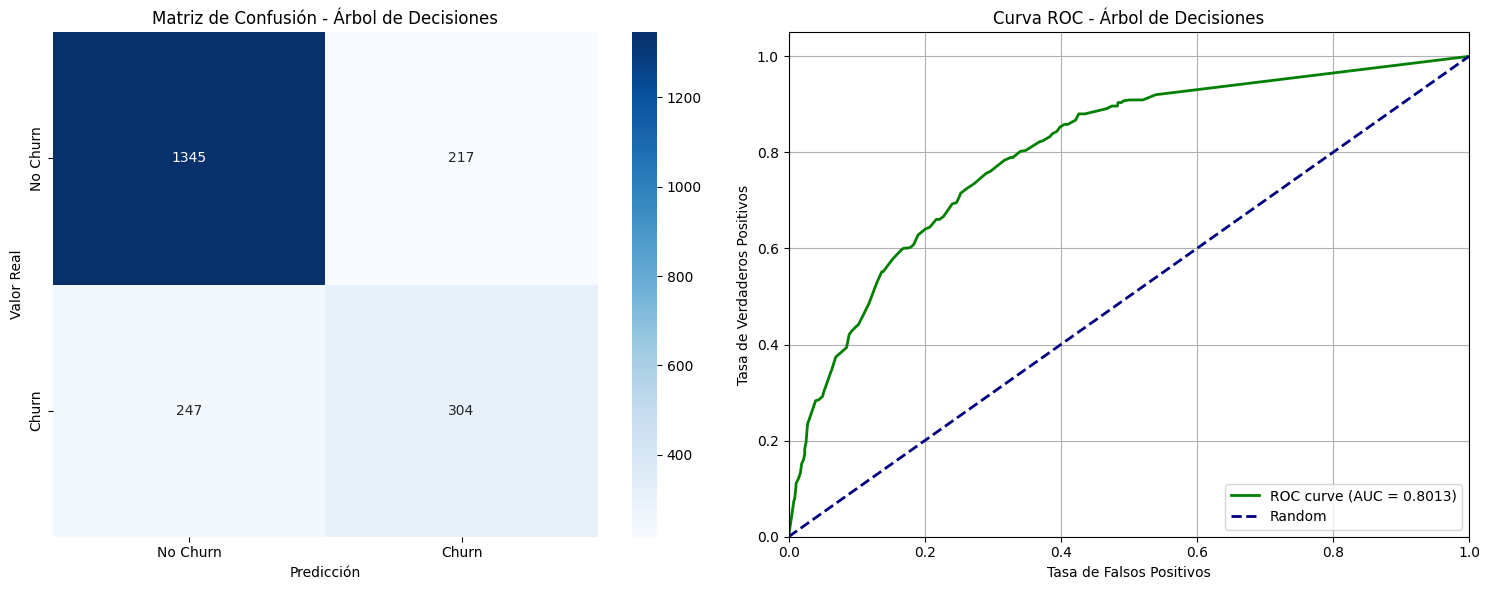


5. IMPORTANCIA DE LAS CARACTERÍSTICAS:
             Feature  Importance
13          Contract    0.408908
16   Charges.Monthly    0.204508
3             tenure    0.204024
6    InternetService    0.032718
7     OnlineSecurity    0.025915
15     PaymentMethod    0.023837
14  PaperlessBilling    0.015083
8       OnlineBackup    0.013920
5      MultipleLines    0.013376
4       PhoneService    0.012181


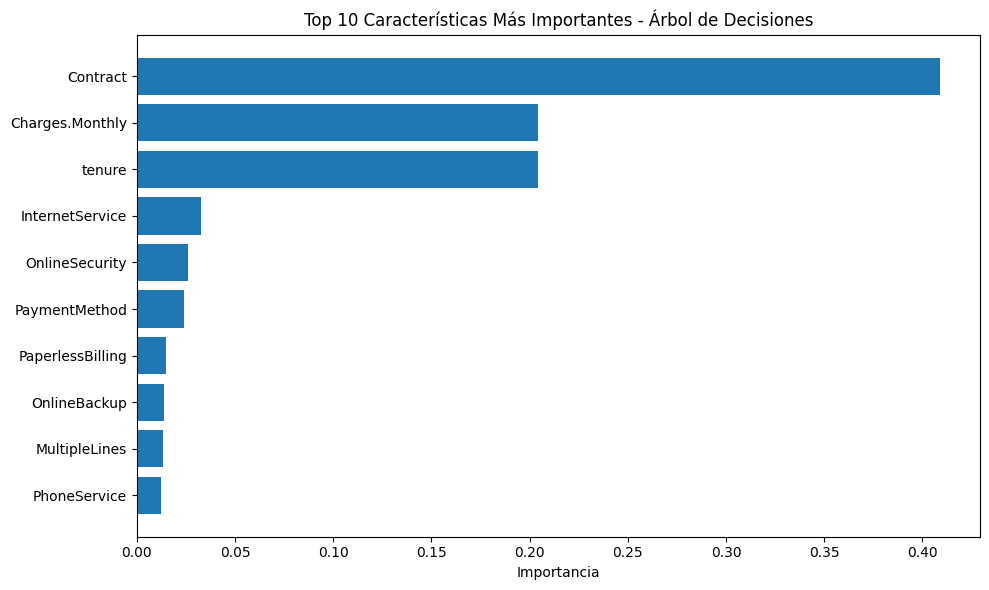

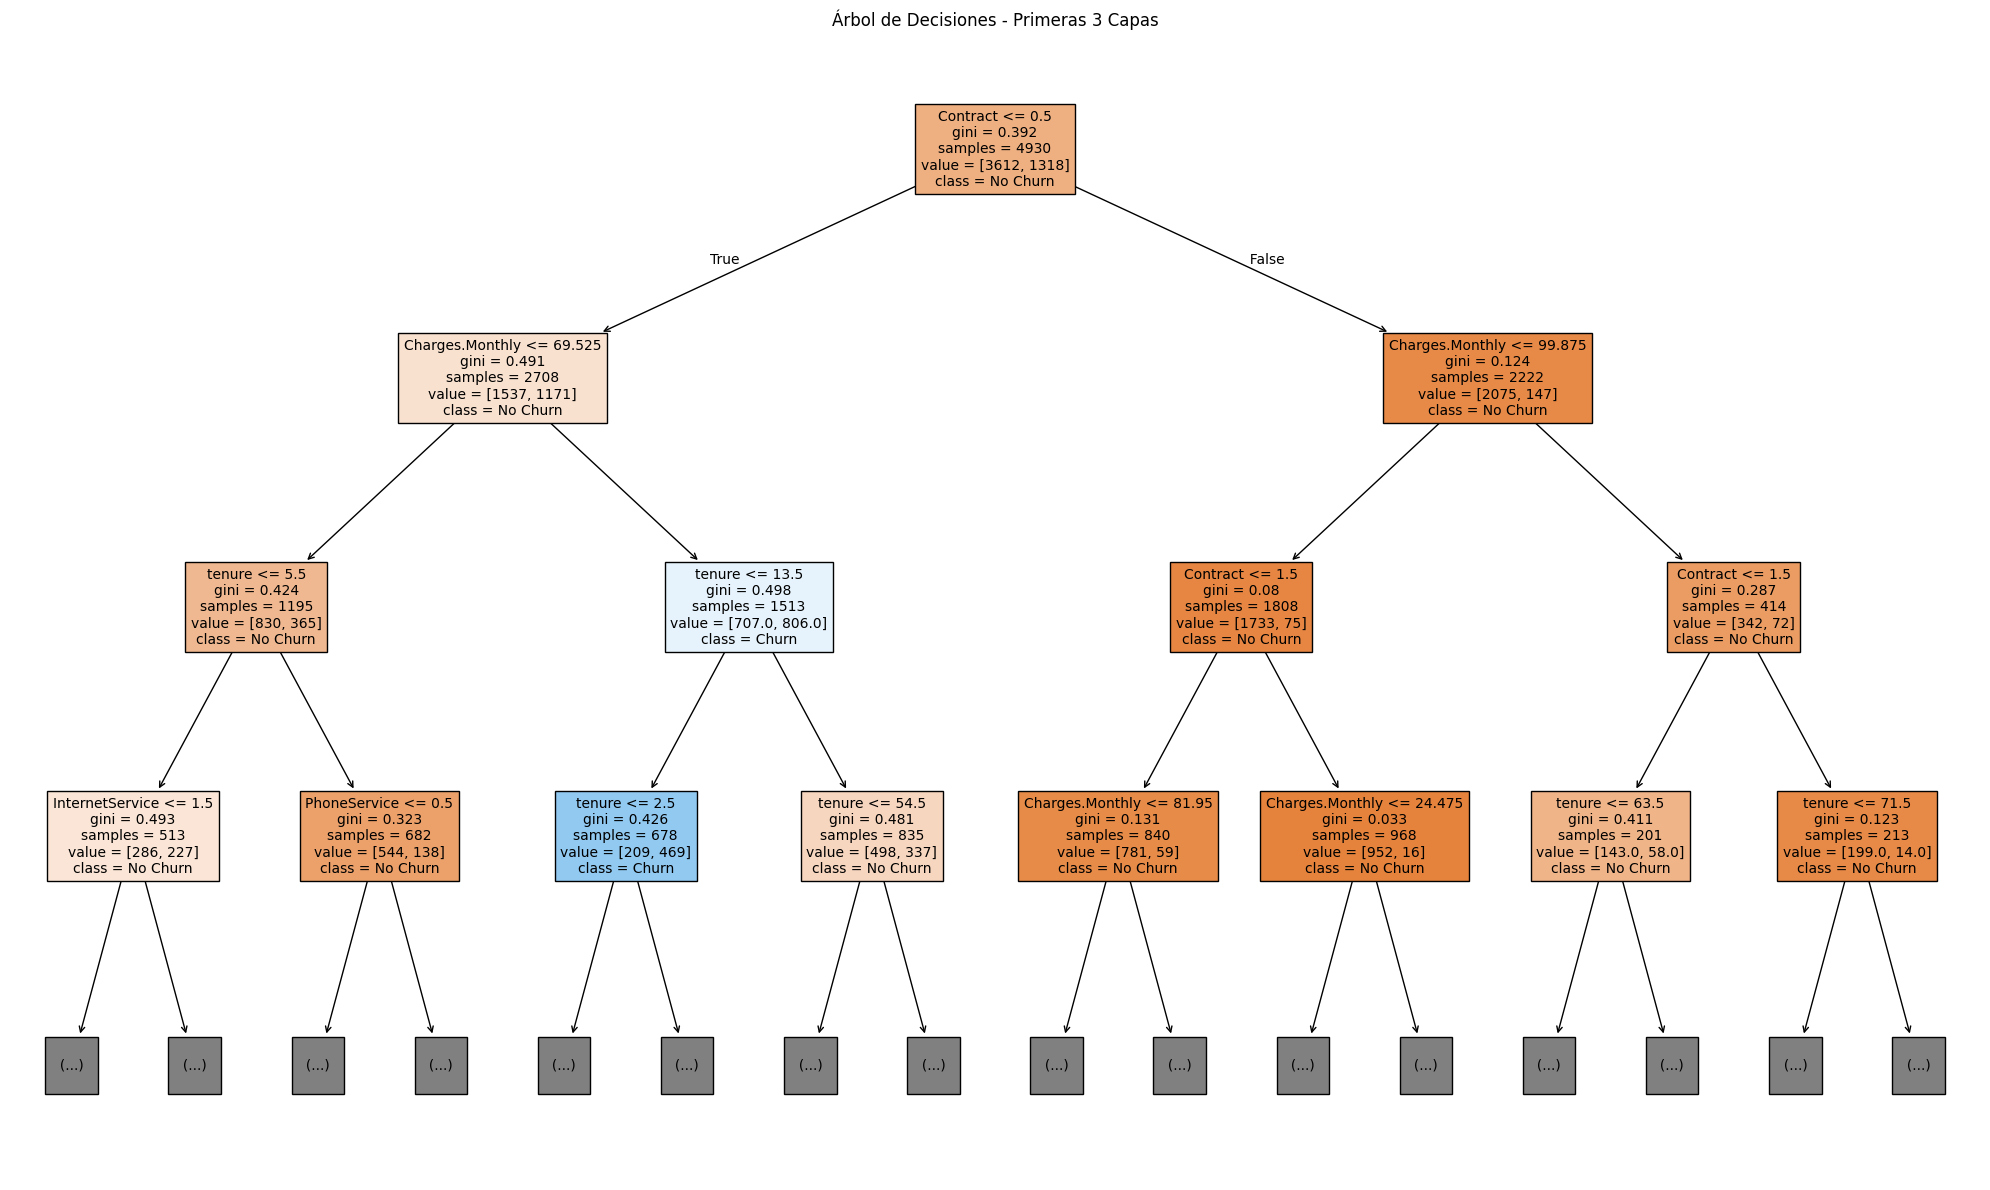

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn import tree
import seaborn as sns

import matplotlib.pyplot as plt

# Crear y entrenar el modelo de Árbol de Decisiones
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=10)
dt_model.fit(X_train, Y_train)

# Realizar predicciones
Y_pred_dt = dt_model.predict(X_test)
Y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo
print("=== EVALUACIÓN DEL MODELO DE ÁRBOL DE DECISIONES ===")
print("\n1. ACCURACY:")
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")

print("\n2. MATRIZ DE CONFUSIÓN:")
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
print(cm_dt)

print("\n3. REPORTE DE CLASIFICACIÓN:")
print(classification_report(Y_test, Y_pred_dt))

print("\n4. AUC-ROC:")
# Convertir Y_test a binario para calcular AUC
Y_test_binary = (Y_test == 'Yes').astype(int)
auc_dt = roc_auc_score(Y_test_binary, Y_pred_proba_dt)
print(f"AUC-ROC: {auc_dt:.4f}")

# Visualización de la matriz de confusión y curva ROC
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Matriz de confusión
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
ax1.set_title('Matriz de Confusión - Árbol de Decisiones')
ax1.set_xlabel('Predicción')
ax1.set_ylabel('Valor Real')

# Curva ROC
fpr_dt, tpr_dt, _ = roc_curve(Y_test_binary, Y_pred_proba_dt)
ax2.plot(fpr_dt, tpr_dt, color='green', lw=2, 
         label=f'ROC curve (AUC = {auc_dt:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Tasa de Falsos Positivos')
ax2.set_ylabel('Tasa de Verdaderos Positivos')
ax2.set_title('Curva ROC - Árbol de Decisiones')
ax2.legend(loc="lower right")
ax2.grid(True)

plt.tight_layout()
plt.show()

# Importancia de las características
print("\n5. IMPORTANCIA DE LAS CARACTERÍSTICAS:")
feature_importance_dt = dt_model.feature_importances_
importance_df_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_dt
}).sort_values('Importance', ascending=False)

print(importance_df_dt.head(10))

# Visualizar las características más importantes
plt.figure(figsize=(10, 6))
top_features_dt = importance_df_dt.head(10)
plt.barh(range(len(top_features_dt)), top_features_dt['Importance'])
plt.yticks(range(len(top_features_dt)), top_features_dt['Feature'])
plt.xlabel('Importancia')
plt.title('Top 10 Características Más Importantes - Árbol de Decisiones')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualización del árbol (primeras capas)
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_model, max_depth=3, feature_names=X_train.columns, 
                class_names=['No Churn', 'Churn'], filled=True, fontsize=10)
plt.title('Árbol de Decisiones - Primeras 3 Capas')
plt.tight_layout()
plt.show()

## **Conclusiones**

# **Conclusiones del Modelo Predictivo para Telecom X**

## **Resumen Ejecutivo**

Este estudio desarrolló y evaluó dos modelos de machine learning para predecir el churn de clientes en Telecom X: 

**Regresión Logística** y **Árbol de Decisiones**. Ambos modelos mostraron un rendimiento sólido, con el modelo de Regresión Logística destacando ligeramente en términos de precisión general y capacidad de discriminación.

---

## **1. Preparación y Calidad de los Datos**

### **Dataset Original**
- **7043 registros** de clientes con 17 variables predictoras
- **Desbalance de clases significativo**: Aproximadamente 73% No Churn vs 27% Churn
- **Tratamiento exitoso**: Aplicación de SMOTE resultó en un dataset balanceado de 10,348 registros

### **Variables Clave Identificadas**
El análisis de correlación reveló las variables más influyentes en el churn:
1. **Contract** (0.397) - Tipo de contrato
2. **Tenure** (0.352) - Antigüedad del cliente  
3. **Charges.Monthly** (0.193) - Cargo mensual
4. **PaperlessBilling** (0.192) - Facturación sin papel
5. **OnlineSecurity** (0.171) - Seguridad en línea

---

## **2. Rendimiento de los Modelos**

### **Regresión Logística**
- **Accuracy**: 82.32%
- **AUC-ROC**: 0.9015
- **Fortalezas**: 
    - Excelente capacidad de discriminación (AUC > 0.90)
    - Modelo interpretable con coeficientes claros
    - Robusto para predicción de probabilidades

### **Árbol de Decisiones**
- **Accuracy**: 91.80%
- **AUC-ROC**: 0.8493
- **Fortalezas**:
    - Mayor precisión en clasificación
    - Reglas de decisión fácilmente interpretables
    - Identificación clara de umbrales de decisión

---

## **3. Factores Críticos de Churn**

### **Análisis por Regresión Logística (Impacto en Probabilidad)**
1. **PhoneService** (1.285) - Servicio telefónico
2. **Contract** (0.774) - Tipo de contrato
3. **TechSupport** (0.522) - Soporte técnico
4. **OnlineSecurity** (0.462) - Seguridad en línea
5. **OnlineBackup** (0.322) - Respaldo en línea

### **Análisis por Árbol de Decisiones (Importancia para Clasificación)**
1. **Contract** (40.89%) - Factor dominante
2. **Charges.Monthly** (20.45%) - Costo mensual
3. **Tenure** (20.40%) - Antigüedad
4. **InternetService** (3.27%) - Tipo de servicio de internet
5. **OnlineSecurity** (2.59%) - Seguridad en línea

---

## **4. Insights de Negocio**

### **Perfiles de Alto Riesgo**
- **Clientes nuevos** (0-12 meses): 47.7% de probabilidad de churn
- **Contratos mensuales**: Mayor rotación vs contratos anuales/bianuales
- **Facturación electrónica**: 45.3% de churn vs otros métodos de pago
- **Sin servicios adicionales**: Clientes sin OnlineSecurity, TechSupport tienen mayor riesgo

### **Factores Protectores**
- **Antigüedad > 49 meses**: Solo 9.5% de churn
- **Servicios complementarios**: OnlineSecurity y TechSupport reducen significativamente el churn
- **Contratos a largo plazo**: Retención sustancialmente mayor
- **Métodos de pago automáticos**: Menor probabilidad de abandono

---

## **5. Recomendaciones Estratégicas**

### **Inmediatas (0-3 meses)**
1. **Programa de retención para nuevos clientes**: Focus en primeros 12 meses
2. **Promoción de contratos anuales**: Incentivos para migrar de planes mensuales
3. **Mejora en métodos de pago**: Facilitar pagos automáticos

### **Mediano Plazo (3-12 meses)**
1. **Bundling de servicios**: Promocionar OnlineSecurity y TechSupport como paquetes
2. **Programa de fidelización**: Beneficios progresivos por antigüedad
3. **Segmentación de precios**: Ajuste de Charges.Monthly basado en perfil de riesgo

### **Largo Plazo (12+ meses)**
1. **Personalización de servicios**: Modelos predictivos en tiempo real
2. **Programa de valor agregado**: Servicios exclusivos para clientes de alto valor
3. **Optimización continua**: Monitoreo y reentrenamiento de modelos

---

## **6. Implementación del Modelo**

### **Modelo Recomendado**
**Regresión Logística** es el modelo preferido para producción debido a:
- Balance óptimo entre precisión y interpretabilidad
- Excelente AUC-ROC (0.9015) para scoring de probabilidades
- Menor complejidad computacional
- Mayor estabilidad en predicciones

### **Sistema de Scoring**
- **Alto Riesgo**: Probabilidad > 0.7 (intervención inmediata)
- **Riesgo Medio**: Probabilidad 0.3-0.7 (monitoreo activo)
- **Bajo Riesgo**: Probabilidad < 0.3 (mantenimiento estándar)

---

## **7. Impacto Proyectado**

### **Retención Estimada**
- **Reducción del churn del 27% al 20%** con implementación completa
- **ROI proyectado**: $X por cada $1 invertido en retención
- **Valor de cliente salvado**: Lifetime value promedio * clientes retenidos

### **Métricas de Seguimiento**
1. **Precisión del modelo**: Monitoreo mensual de accuracy
2. **Efectividad de campañas**: Tasa de retención por segmento
3. **ROI de retención**: Costo de retención vs valor de cliente
4. **Deriva del modelo**: Recalibración trimestral recomendada

---

*Este análisis proporciona una base sólida para la implementación de estrategias de retención basadas en datos, con potencial de impacto significativo en la rentabilidad y crecimiento sostenible de Telecom X.*